# Arbeitsgrundlagen
## Typen von Messfehlern

* _Systematische Fehler_ werden verursacht durch die Versuchsanordnung, die Versuchsumgebung oder den Messvorgang. Sie bewirken eine systematische Abweichung des des Messergebnisses vom eigentlichen Wert. Diese Abweichung wird auch Unsicherheit genannt. Diese Art von Fehler kann – werden sie erkannt – meistens korrigiert werden.
* _Zufällige Fehler_ sind immer vorhanden und lassen sich durch mehrmalige Wiederholung eines Experimentes beliebig verkleinern.

## Genauigkeit bei der Angabe von Messresultate

Es ist nicht hilfreich bei Resultaten mehr signifikante Ziffern anzugeben als jene, die innerhalb des Fehlerbereiches liegen.
In einem Beispiel wird angenommen dass der absolute Fehler 3.6 Sekunden betrage. Der Mittelwert aus den Messungen betrage 118.8 Sekunden. Mit einem resultierenden relativen Fehler von 3% ist es durchaus angebracht die Resultate auf ganze Zahlen zu runden, da alle weiteren signifikanten Ziffern sowieso in den Toleranzen verloren gingen.

## Fehlerbestimmung bei Einzelgrössen
### Einfacher Mittelwert

Seien $x_1, x_2, ...,x_N$ $N$ Messergebnisse aus einer Reihe von identischen Experimenten, so wird der Mittelwert anhand von Gleichung \ref{eq:mean} bestimmt werden. Sein zugehöriger Fehler kann mit Gleichung \ref{eq:sem} bestimmt werden. Beide Werte werden genauer mit grösserem $N$.

\begin{equation}
\overline{x} = \frac{1}{N} \sum_{i=1}^{N}{x_i}
\label{eq:mean}
\end{equation}

\begin{equation}
s_{\overline{x}} = \sqrt{ \frac{\sum_{1}^{N}{(x_i-\overline{x})^2}}{N \cdot (N-1)}}
\label{eq:sem}
\end{equation}

Das resultierende Ergebnis wird wie in Gleichung \ref{eq:result} ersichtlich formuliert.

\begin{equation}
x = \overline{x} \pm s_{\overline{x}}
\label{eq:result}
\end{equation}

### Mittelwert mit Gewichten

<center>
$x_1 = \overline{x_1} \pm s_{\overline{x_1}}$  
$x_2 = \overline{x_2} \pm s_{\overline{x_2}}$  
...   
$x_n = \overline{x_n} \pm s_{\overline{x_n}}$
</center>

Der wahrscheinlichste Wert $\overline{x}$  wird  durch  einen gewichteten Mittelwert mit der Gleichung \ref{eq:weightedmean} erreicht.
Die Gewichte dazu werden nach \ref{eq:weights} berechnet.
Den zugehörigen Fehler wird durch \ref{eq:weightedsem} bestummen.

\begin{equation}
\overline{x} = \frac{ \sum_{i=1}^n{ g_{\overline{x_i}} \cdot x_i } }{ \sum_{i=1}^n{ g_{\overline{x_i}} }{  } }
\label{eq:weightedmean}
\end{equation}
\begin{equation}
g_{\overline{x_i}} = \frac{1}{s_{\overline{x_i}^2}}
\label{eq:weights}
\end{equation}
\begin{equation}
\text{Fehler des gewichteten Mittelwertes: } s_{\overline{x}} = \frac{1}{\sqrt{\sum_{i=1}^n{g_{\overline{x_i}}}}}
\label{eq:weightedsem}
\end{equation}

Messergebnisse  mit betragsmässig  kleineren Fehlern  werden also  stärker
gewichtet.

## Fehlertheorie

Eine Werteverteilung der Form einer Gausskurve kann mit der Gleichung in \ref{eq:gaussverteilung} beschrieben werden. Damit kann etwas über die Werteverteilung  und auch den Wahren Wert ausgesagt werden

\begin{equation}
h(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \cdot exp\left(- \frac{(x-x_0)^2}{2\sigma^2}\right) \\
\text{wobei}
\label{eq:gaussverteilung}
\end{equation}
mit 
<center>
<t>Erwartungswert (wahrer Wert)</t>: $x_0$  
<t>Standardabweichung</t>: $\sigma$
</center>

Die experimentelle Standardabweichung kann mit Gleichung \ref{eq:expstd} bestimmt werden. Mit steigendem $N$ nähert sich der gemessene Mittelwert $\overline{x}$ dem wahren Wert $x_0$ an.

\begin{equation}
\text{Experimentelle Standardabweichung: } s = \sqrt{\frac{\sum_1^N{(x_i-\overline{x})^2}}{N-1}}
\label{eq:expstd}
\end{equation}

Die  experimentelle Standardabweichung $s$ konvergiert  für $N \rightarrow \infty$ gegen $\sigma$. Der Fehler der Einzelmessung $s_{T_i}$ und der Fehler
$s_{\overline{T}}$ des Mittelwertes stehen in der in \ref{eq:stdrelation} beschriebenen Beziehung.

\begin{equation}
s_{\overline{T}} = \frac{s_{T_i}}{\sqrt{N}}
\label{eq:stdrelation}
\end{equation}

## Regression

Im allgemeinen wird bei der Regression iteriert bis mit \ref{eq:chi2} ein Minimum für $\chi^2$ gefunden ist.
\begin{equation}
\chi^2(a_0,a_1,...) = \sum_{1}^{N}{\frac{[y_i - f(x_i,a_0,a_1,...)]^2}{\sigma_i^2}}
\label{eq:chi2}
\end{equation}

mit

<center>
<t>Gegebene Gesetzmässigkeit</t> $f(x,a_0,a_1)$  
<t>Messwertpaare</t> $x_i,y_i$
</center>

* _Nichtlineare   Funktionen  $f$_: Nichtlineare   Regression.
* _Polynomiale Funktion  $f$_: Lineare Regression. Unabhängig vom Startwert  existiert  lediglich  ein Minimum. Startwerte  für  $a_i$ daher nicht relevant.
        
Berechnung des Fehlers $\sigma_i$ der Einzelmessung aus dem Fit:

\begin{equation*}
\sigma_i = \sqrt{\frac{\sum_1^N{(y_i-f(x_i,a_0,a_1,...)})^2}{N - m}}
\end{equation*}

Wobei $N$  die Anzahl  Messergebnisse, $m$  die Anzahl  Parameter $a_0,...a_m$
bezeichnet.

## Das Fehlerfortpflanzungsgesetz

Gegeben seien
{{(1+1)}}
<center>
<t>Resultatgrösse</t>: R = R(x,y,z,...)  
<t>Argumente (gemessen und/oder aus Literatur)</t>:  
x = $\overline{x} \pm s_{\overline{x}}$  
y = $\overline{y} \pm s_{\overline{y}}$  
z = $\overline{z} \pm s_{\overline{z}}$
</center>

und gesucht sind Mittelwert $\overline{R}$ und mittlerer Fehler $s_{\overline{R}}$. Dann kann der mittlere absolute Fehler (statistischer Fehler) mit dem _Gauss'schen Fehlerfortpflanzungsgesetz_ in \ref{eq:ffg} bestummen werden:

\begin{equation}
s_{\overline{R}} = \sqrt{ \left( \frac{\partial R}{\partial x} \biggr\rvert_{\overline{R}} \cdot s_{\overline{x}}\right)^2 + \left( \frac{\partial R}{\partial y} \biggr\rvert_{\overline{R}} \cdot s_{\overline{y}}\right)^2 + \left( \frac{\partial R}{\partial z} \biggr\rvert_{\overline{R}} \cdot s_{\overline{z}}\right)^2 + ... }
\label{eq:ffg}
\end{equation}

## Spezialfälle des Fehlerfortpflanzungsgesetzes

<center>
<t>Addition und Subtraktion</t>: $s_R = \sqrt{s_x^2 +  s_y^2}$  
<t>Multiplikation und Division</t>: $r_R = \frac{s_R}{R} = \sqrt{(\frac{s_x}{x})^2 + (\frac{s_y}{y})^2} = \sqrt{r_x^2 + r_y^2}$  
<t>Potenzen</t>: $r_R = \frac{s_R}{R} = n * r_x$.
</center>

In Endresultaten sind immer absolute Fehler anzugeben.

# Durchführung

Die Messwerte zu den einzelnen Versuchen wurden durch den Dozenten zur Verfügung gestellt. Sie sind alle im Anhang vorzufinden.
Die zur Versuchsdurchführung verwendeten Tools beinhalten den Taschenrechner, Excel und Python mit diversen Libraries (Jupyter, Scipy, Pandas, Matplotlib, Seaborn).

In [1]:
# Preparations
import math
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from scipy import stats
from scipy.optimize import curve_fit
import seaborn as sns
from IPython.display import Latex
import warnings
warnings.filterwarnings("ignore", module="matplotlib")
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.rcParams['savefig.dpi'] = 75

# plt.rcParams['figure.autolayout'] = False
# plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.unicode'] = True
plt.rcParams['font.family'] = "STIX"
plt.rcParams['text.latex.preamble'] = "\\usepackage{subdepth}, \\usepackage{type1cm}"

sns.set(color_codes=True)

def average(data):
    return 1 / len(data) * sum(data)

def error(data, average_of_data):
    s = sum([(x - average_of_data)**2 for x in data])
    return math.sqrt(s / (len(data) * (len(data) - 1)))

def std_deviation(error_of_average, length_of_dataset):
    return error_of_average * math.sqrt(length_of_dataset)

def average_with_weights(data, weights):
    sum1 = 0
    for i in range(len(data)):
        sum1 += data[i] * weights[i]
    sum2 = sum(weights)
    print(sum2)
    return sum1 / sum2

def wavg(group, avg_name, weight_name):
    d = group[avg_name]
    w = group[weight_name]
    return (d * w**-2).sum() / (w**-2).sum()

def werr(group, weight_name):
    return 1 / math.sqrt((group[weight_name]**-2).sum())

# Auswertung
Dieses Kapitel befasst sich mit den Möglichkeiten und Tricks der Fehlerrechnung. Normalerweise würde dieses Kapitel separat geführt, jedoch ist das Ziel dieses Versuches, die Fehlerrechnung näher kennenzulernen.

In [2]:
# Evaluate Data

# Read Data
v1_df = pd.read_csv('data/laufzeiten.csv')
v1_s = 2.561
v1_s_u = 0.003
v1_theta = 23

# Calculate mean etc.
v1_mean = v1_df.mean()['t']
v1_sem = v1_df.sem()['t']
v1_std = v1_df.std()['t']

# Calculate velocity & error
v1_v = v1_s / v1_mean
v1_v_u = math.sqrt((v1_s_u / v1_mean)**2 + (-v1_s * v1_sem / v1_mean**2)**2)

v1_error_percent_v = v1_v_u / v1_v * 100
v1_error_percent_t = v1_sem / v1_mean * 100

## Schallgeschwindigkeit

Die Schallgeschwindigkeit soll durch die Mittlere Laufzeit über eine bekannte Strecke bestimmt werden.

### Messwerte

<center>
    <t>Länge der Messstrecke</t>: s = {{v1_s}}±{{v1_s_u}}m  
    <t>Raumtemparatur</t>: $\theta$ = {{v1_theta}}$^{\circ}$C
</center>

Messprotokoll: TODO:

### Mittlere Laufzeit und ihre Unsicherheit laut Wikipedia

Wikipedia führt eine Formel \ref{eq:vschall} zur Berechnung der Schallgeschwindigkeit bei einer bestimmten Temperatur. Diese kann auch in _Horst Kuchlings Teschenbuch der Physik_ gefunden werden.

\begin{equation}
c_{luft} = (331.3 + 0.606 \cdot \theta) \frac{m}{s} = (331.3 + 0.606 \cdot 23) \frac{m}{s} = 345.24\frac{m}{s}
\label{eq:vschall}
\end{equation}

### Mittlere Laufzeit und ihre Unsicherheit

<center>
    <t>Mittlere Laufzeit</t>: $\overline{t}$ = $\frac{1}{20} \sum_{i=1}^{20}{t_i}$ = {{'{0:.2f}'.format(v1_mean*1e3)}}ms  
    <t>Fehler der mittleren Laufzeit</t>: $s_{\overline{i}}$ = $\sqrt{\frac{\sum_{1}^{20}{(t_i-\overline{t})^2}}{20 \cdot 19}}$ = {{'{0:.6f}'.format(v1_sem)}}ms  
    <t>Standardabweichung</t>: s = $\sqrt{\frac{\sum_1^{20}{(t_i-\overline{t})^2}}{19}}$ = {{'{0:.5f}'.format(v1_std)}}ms  
</center>

Mithilfe des zuvor ermittelten Mittelwertes kann die Mittlere Schallgeschwindigkeit als:  
<center>
    c = {{('{0:.2f}'.format(v1_v))}}$\frac{m}{s}$
</center>
festgestellt werden.
Die Unicherheit des Mittelwertes der Schallgeschwindigkeit kann mithilfe des Gauss'schen Fehlerfortpflanzungsgesetztes ersichtlich in (1) errechnet werden.

<center>
$R(x, y)$ = $c(s, t)$ = $\frac{s}{t}$  
$S_{\overline{R}}$ = $\sqrt{(\frac{\partial R}{\partial x}|_{\overline{R}}\cdot s_{\overline{x}})^2 + (\frac{\partial R}{\partial y}|_{\overline{R}}\cdot s_{\overline{y}})^2}$  
$S_{\overline{R}}$ = $\sqrt{(\frac{1}{\overline{t}}s_{\overline{s}})^2+(-\frac{\overline{s}}{\overline{t}^2}s_{\overline{t}})^2}$  
$s_{\overline{s}}$ = {{'{0:.2f}'.format(v1_v_u)}}$\frac{m}{s}$  
<t>Relativer Fehler der Zeit</t>: {{'{0:.2f}'.format(v1_error_percent_t)}}%  
<t>Relativer Fehler der Geschwidigkeit</t>: {{'{0:.2f}'.format(v1_error_percent_v)}}%
</center>

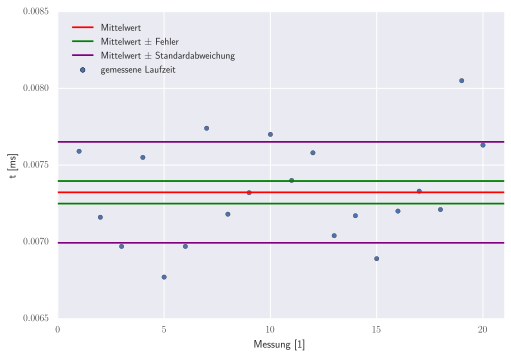

In [33]:
# Plot all values

ax = v1_df.plot(kind='scatter', x='measurement', y='t', label='gemessene Laufzeit')
plt.xlabel('Messung [1]')
plt.xlim([0, len(v1_df['t']) + 1])
plt.ylim([0.0065, 0.0085])
plt.ylabel('t [ms]')
plt.axhline(y=v1_mean, axes=ax, color='red', label='Mittelwert')
plt.axhline(y=v1_mean+v1_sem, axes=ax, color='green', label='Mittelwert ± Fehler')
plt.axhline(y=v1_mean-v1_sem, axes=ax, color='green')
plt.axhline(y=v1_mean+v1_std, axes=ax, color='purple', label='Mittelwert ± Standardabweichung')
plt.axhline(y=v1_mean-v1_std, axes=ax, color='purple')
plt.legend(bbox_to_anchor=(0.02, 0.98), loc=2, borderaxespad=0.2)
plt.show()
#plt.savefig('laufzeiten.pgf')

## Eisengehalt
### Messwerte

TODO:

In [14]:
# Evaluate Data

# Read Data
v2_df = pd.read_csv('data/eisengehalt.csv')

# Calculate mean etc.
v2_mean = v2_df.mean()['content']
v2_sem = v2_df.sem()['content']
v2_weightedmean = wavg(v2_df, 'content', 'error')
v2_weightedsem = werr(v2_df, 'error')



### Einfacher Mittelwert
Der einfache Mittelwert und sein Fehler ergeben sich analog zu Aufgabe 1.

<center>
$\overline{x}$ = {{'{0:.2f}'.format(v2_mean)}}%  
$s_{\overline{x}}$ = {{'{0:.2f}'.format(v2_sem)}}%
</center>

### Gewichteter Mittelwert

Der gewichtete Mittelwert und sein Fehler werden als

<center>
$\overline{x}$ = $\frac{ \sum_{i=1}^n{ g_{\overline{x_i}} \cdot x_i } }{ \sum_{i=1}^n{ g_{\overline{x_i}} }{  } }$ = {{'{0:.2f}'.format(v2_weightedmean)}}%  
$s_{\overline{x}}$ = $\frac{1}{\sqrt{\sum_{i=1}^n{g_{\overline{x_i}}}}}$ = {{'{0:.2f}'.format(v2_weightedsem)}}%
</center>

bestummen.

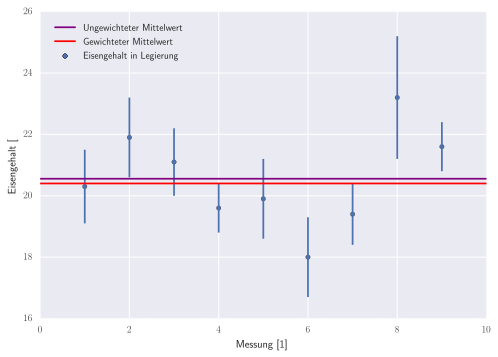

In [35]:
# Plot all data

ax = v2_df.plot(yerr=v2_df['error'], kind='scatter', x='measurement', y='content', label='Eisengehalt in Legierung')
plt.axhline(y=v2_mean, axes=ax, color='purple', label='Ungewichteter Mittelwert')
plt.axhline(y=v2_weightedmean, axes=ax, color='red', label='Gewichteter Mittelwert')
plt.xlabel('Messung [1]')
plt.xlim([0, len(v2_df['content']) + 1])
plt.ylabel('Eisengehalt [%]')
plt.legend(bbox_to_anchor=(0.02, 0.98), loc=2, borderaxespad=0.2)
plt.show()

#plt.savefig('eisengehalt.pgf')

## Federkonstante
### Messwerte

In [4]:
# Evaluate Data

# Read Data
v3_df = pd.read_csv('data/federkonstante.csv')

# Find best values with a fit
def spring(z, k, F0):
    return k * z + F0

v3_values, v3_covar = curve_fit(spring, v3_df['z'], v3_df['F'])

v3_F_fit = [spring(z, v3_values[0], v3_values[1]) for z in v3_df['z']]

v3_slope, v3_intercept, v3_r_value, v3_p_value, v3_std_err = stats.linregress(v3_df['z'], v3_df['F'])

### Rechnung mittels Taschenrechner

### Linear Regression

#### Mit dem Rechner

Die Steigung der Regressionsgeraden und somit die Federkonstante $k$ wird wie folgt erhalten:

<center>
    $k$ = $\frac{\sum_{i=1}^{10}(x_i-\overline{x})(y_i-\overline{y})}{\sum_{i=1}^{10}(x_i-\overline{x})^2}$ = {{'{0:.2f}'.format(v3_values[0])}}$\frac{N}{m}$
</center>

Der zugehörige Achsenabschnitt und somit die Ruhekraft $F_0$ errechnet sich aus:

<center>
    $F_0$ = $\overline{y} - k \cdot \overline{x}$ = {{'{0:.2f}'.format(v3_values[1])}}N
</center>

Die empirische Korrelation ist:

<center>
    $r_{xy}$ = $\frac{\sum_{1}^{10}(x_i - \overline{x}) \cdot (y_i - \overline{y})}{\sqrt{\sum_{1}^{10}(x_i-\overline{x})^2 \cdot \sum_{1}^{10}(y_i-\overline{y})^2}}$ = {{'{0:.4f}'.format(v3_r_value)}}
</center>

mit zugehörigem Bestimmtheitsmass:

<center>
    $R^{2}$ = $r_{xy}^2$ = {{'{0:.4f}'.format(v3_r_value**2)}}
</center>

#### Mit scipy

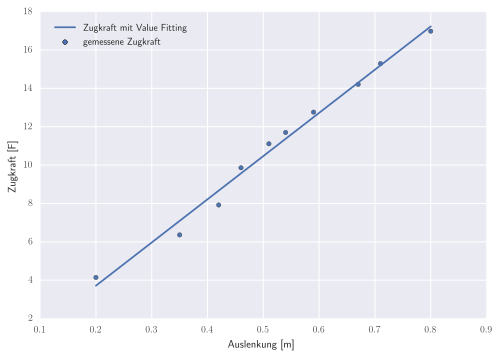

In [42]:
# Plot all data
ax = v3_df.plot(kind='scatter', x='z', y='F', label='gemessene Zugkraft')
plt.plot(v3_df['z'], v3_F_fit, axes=ax, label='Zugkraft mit Value Fitting')
plt.xlabel('Auslenkung [m]')
plt.ylabel('Zugkraft [F]')
plt.legend(bbox_to_anchor=(0.02, 0.98), loc=2, borderaxespad=0.2)
plt.show()

Der Fit errechnet die folgenden relevenanten Werte für das Experiment:

<center>
    $k$ = {{'{0:.2f}'.format(v3_values[0])}}$\frac{N}{m}$  
    $F_0$ = {{'{0:.2f}'.format(v3_values[1])}}N  
    $r_{xy}$ = {{'{0:.4f}'.format(v3_r_value)}}
</center>

In [6]:
# Evaluate Data

# Read Data
v4_df = pd.read_csv('data/pendel.csv')

def pendulum(t, A, l, f, d, y0):
    return A * np.exp(-l*t)*np.sin(2*math.pi*f*t-d)+y0

v4_values, v4_covar = curve_fit(pendulum, v4_df['t'], v4_df['y'])
v4_y_fit = [pendulum(t, v4_values[0], v4_values[1], v4_values[2], v4_values[3], v4_values[4]) for t in v4_df['t']]

v4_valerr = np.sqrt(np.diag(v4_covar))

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:7: RuntimeWarning: overflow encountered in exp


## Offset, Amplitude, Frequenz und Phase eines Pendels

Von einem Pendel ist die Auslenkung in y-Richtung zu verschiedenen Zeitpunkten $t_i$ bekannt.
Mithilfe der Methode der kleinsten Quadrate können Offset, Amplitude, Frequenz und Phase des Pendels bestimmt werden.
Die Funktion des Pendels welche mit dem Fit angenähert wird schreibt sich wie folgt:

<center>
    $y(t)$ = $A\cdot exp(-\Gamma\cdot t)\cdot sin(2\cdot\pi\cdot f\cdot t-\delta)+y_0$
</center>

### Messwerte

TODO:

### Value Fitting

Mit der Methode der Chi-Quadrate (nichtlineare Regression) wurden durch scipy die folgenden besten Werte ermittelt:

<center>
    $A$ = ({{'{0:.2f}'.format(v4_values[0])}} ± {{'{0:.2f}'.format(v4_valerr[0])}})m  
    $\Gamma$= ({{'{0:.2f}'.format(v4_values[1])}} ± {{'{0:.4f}'.format(v4_valerr[1])}})$\frac{1}{s}$  
    $f$ = ({{'{0:.2f}'.format(v4_values[2])}} ± {{'{0:.4f}'.format(v4_valerr[2])}})Hz  
    $\delta$ = ({{'{0:.2f}'.format(v4_values[3])}} ± {{'{0:.2f}'.format(v4_valerr[3])}})  
    $y_0$ = ({{'{0:.2f}'.format(v4_values[4])}} ± {{'{0:.2f}'.format(v4_valerr[4])}})m
</center>

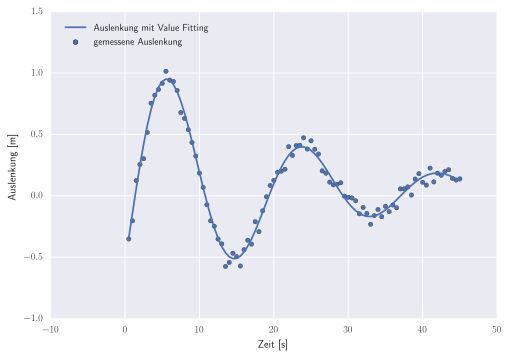

In [45]:
# Plot all data
ax = v4_df.plot(kind='scatter', x='t', y='y', label='gemessene Auslenkung')
plt.plot(v4_df['t'], v4_y_fit, axes=ax, label='Auslenkung mit Value Fitting')
plt.xlabel('Zeit [s]')
plt.ylabel('Auslenkung [m]')
plt.legend(bbox_to_anchor=(0.02, 0.98), loc=2, borderaxespad=0.2)
plt.show()

In [15]:
# Read data

# Calculate parameters of fit
import functools
v5_df = pd.read_csv('data/tiefpass.csv')
v5_Ue = 4
v5_R = 500

def Ua(Ue, R, f, C):
    return Ue / 2 / np.sqrt(1+(2*math.pi*f*C*R)**2)

def phi(R, f, C):
    return np.arctan(-2*math.pi*f*R*C)/2/math.pi*360
    
v5_values_Ua, v5_covar_Ua = curve_fit(functools.partial(Ua, v5_Ue, v5_R), v5_df['f'], v5_df['Ua'].div(2))
v5_f_fit = np.linspace(10, v5_df['f'][len(v5_df['f'])-1], 1000)
v5_Ua_fit = [Ua(v5_Ue, v5_R, f, -v5_values_Ua[0]) * 2 for f in v5_f_fit]
v5_valerr_Ua = np.sqrt(np.diag(v5_covar_Ua))


v5_values_phi, v5_covar_phi = curve_fit(functools.partial(phi, v5_R), v5_df['f'], v5_df['phi'])
v5_phi_fit = [phi(v5_R, f, v5_values_phi[0]) for f in v5_f_fit]
v5_valerr_phi = np.sqrt(np.diag(v5_covar_phi))

## Tiefpass
### Messwerte

<center>
    $U_e$ = {{v5_Ue}}$V_{pp}$ => ±{{v5_Ue / 2}}$\hat{V}$  
    $R$ = {{v5_R}}$\Omega$
</center>

### Berechnung von C

Die Kapazität C kann durch zwei verschiedene Funktionen bestimmt werden:

<center>
    $Û_a$ = $\frac{Û_e}{\sqrt{1+(2\pi fCR)^2}}$  
    $\phi$ = $\arctan(-\omega RC)$
</center>

Die Kapazität kann mit einem Fit an die Ausgangsspannung $U_a$ auf

<center>
    $C$ = {{'{0:.2f}'.format(-v5_values_Ua[0] * 1e9)}}nF  
    $s_C$ = {{'{0:.2f}'.format(v5_valerr_Ua[0] / 1e-9)}}nF
</center>

und mit einem Fit an die Phase $U_a$ auf

<center>
    $C$ = {{'{0:.2f}'.format(v5_values_phi[0] * 1e9)}}nF  
    $s_C$ = {{'{0:.2f}'.format(v5_valerr_phi[0] / 1e-9)}}nF
</center>
    
bestimmt werden.



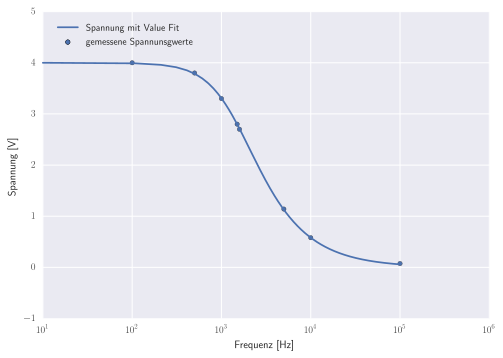

In [51]:
# Plot all data
ax = v5_df.plot(kind='scatter', x='f', y='Ua', label='gemessene Spannunsgwerte', logx=True)
plt.plot(v5_f_fit, v5_Ua_fit, axes=ax, label='Spannung mit Value Fit')
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Spannung [V]')
plt.legend(bbox_to_anchor=(0.02, 0.98), loc=2, borderaxespad=0.2)
plt.show()

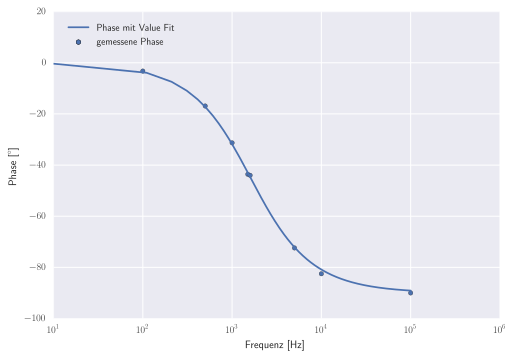

In [52]:
# Plot all data

ax = v5_df.plot(kind='scatter', x='f', y='phi', label='gemessene Phase', logx=True)
plt.plot(v5_f_fit, v5_phi_fit, axes=ax, label='Phase mit Value Fit')
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Phase [$^{\circ}$]')
plt.legend(bbox_to_anchor=(0.02, 0.98), loc=2, borderaxespad=0.2)
plt.show()

# Resultate und Diskussion

## Schallgeschwindigkeit

### Ergebnisse

|Grösse|Wert|
|----|----|
|Schallgeschwindigkeit in Luft $c_{luft, wikipedia}$|345.3$\frac{m}{s}$|
|Mittelwert $\overline{c}$|{{'{0:.2f}'.format(v1_v)}}$\frac{m}{s}$|
|Unsicherheit des Mittelwertes $s_{\overline{c(s, t)}}$|{{'{0:.2f}'.format(v1_v_u)}}$\frac{m}{s}$|
|Schallgeschwindigkeit $c_{luft}=\overline{c_{luft}}±s_{\overline{c_{luft}}}$|({{'{0:.2f}'.format(v1_v)}} ± {{'{0:.2f}'.format(v1_v_u)}})$\frac{m}{s}$|

Der experimentell bestimmte Wert hat somit eine Abweichung von {{'{0:.2f}'.format((v1_v-345.3)/v1_v*100)}}% von Literaturwerten. Dies zeigt dass der Wert ziemlich genau bestummen werden konnte.
Des weiteren sind zu den Literaturwerten keine Toleranzen bekannt. Dies lässt darauf schliessen dass diese schlichtweg unbekannt sind oder einfach weggelassen wurden. Somit kann es gut sein dass der errechnete Wert im Toleranzbereich liegt.

Ausserdem liegen 13 von 20 Messpunkten innerhalb des Standardabweichungsintervalles. Dies sind 65% was ziemlich gut dem erwarteten Wert von 68% entspricht. Mit zusätzlichen Experimenten und Messungen würde sich der Wert gut gegen 68% annähern.

Die Messresultate sind alles in allem plausibel und ergeben gute Werte.

## Eisengehalt

||gewichtet|ungewichtet|
|----|----|----|
|Mittelwert|{{'{0:.2f}'.format(v2_mean)}}%|{{'{0:.2f}'.format(v2_weightedmean)}}%|
|Unsicherheit|{{'{0:.2f}'.format(v2_sem)}}%|{{'{0:.2f}'.format(v2_weightedsem)}}%|
|Eisengehalt|({{'{0:.2f}'.format(v2_mean)}} + {{'{0:.2f}'.format(v2_sem)}})%|({{'{0:.2f}'.format(v2_weightedmean)}} + {{'{0:.2f}'.format(v2_weightedsem)}})%|

die Resultate des gewichteten sowie ungewichteten Mittelwert unterscheiden sich um lediglich {{'{0:.4f}'.format((1 - v2_weightedmean / v2_mean) * 100)}}%. Ein Unterschied im Promillebereich. Jedoch beträgt die Unsicherheit beim gewichteten Mittelwert ganze {{'{0:.2f}'.format((1 - v2_weightedsem / v2_sem)/0.01)}}% weniger, was ihn um einiges präziser als den ungewichten Mittelwert macht. Er wäre dem ungewichteten Mittelwert vorzuziehen für weitere Berechungen.

## Federkonstante

||TI-89|linear Regression|
|----|----|----|
|Federkonstante $k$|{{'{0:.2f}'.format(v3_values[0])}}$\frac{N}{m}$|{{'{0:.2f}'.format(v3_values[0])}}$\frac{N}{m}$|
|Vorspannung $F_0$|{{'{0:.2f}'.format(v3_values[1])}}N|{{'{0:.2f}'.format(v3_values[1])}}N|
|Empirische Korrelation $r_{xy}$|{{'{0:.4f}'.format(v3_r_value)}}|{{'{0:.4f}'.format(v3_r_value)}}|
|Bestimmtheitsmass $R^2$|{{'{0:.4f}'.format(v3_r_value**2)}}%|{{'{0:.4f}'.format(v3_r_value**2)}}%|

Beide betrachteten Methoden – mit dem TI-89 sowie auch mit der linearen Regression von scipy wurden identische Ergebnisse erzielt. Es ist somit anzunehmen, dass die beiden Instrumente mit der gleichen Algorithmik (wahrscheinlich die Methode der kleinsten Quadrate) arbeitet.

## Pendel

Mit einem Fit der Gleichung für das gedämpfte Pendel lassen sich die nachstehenden charakteristischen Werte für das schwingende Pendel bestimmen.

|Grösse|Wert|
|----|----|
|Amplitude $A$|({{'{0:.2f}'.format(v4_values[0])}} ± {{'{0:.2f}'.format(v4_valerr[0])}})m |
|Dämpfung $\Gamma$|({{'{0:.2f}'.format(v4_values[1])}} ± {{'{0:.4f}'.format(v4_valerr[1])}})$\frac{1}{s}$|
|Frequenz $f$|({{'{0:.2f}'.format(v4_values[2])}} ± {{'{0:.4f}'.format(v4_valerr[2])}})Hz|
|Phasenverschiebung $\delta$|({{'{0:.2f}'.format(v4_values[3])}} ± {{'{0:.2f}'.format(v4_valerr[3])}})|
|Anfangsauslenkung $y_0$|({{'{0:.2f}'.format(v4_values[4])}} ± {{'{0:.2f}'.format(v4_valerr[4])}})m|

Bei einem Vergleich der gefitteten Kurve mit der Kurve der gemessenen Werten lässt sich feststellen dass diese Werte alle plausibel sind.
Gute Anfangswerte waren nicht notwendig, der Fit hat bestens ohne geklappt!

## Tiefpass

Bei diesem Versuch wurde wiederum mit einem nichtlinearen Fit gearbeitet. Wiederum war es keine Notwenigkeit die Startwerte zu berechnen.
Bei diesem Versuch standen jedoch zwei verschiedene Messreihen zur Verfügung um die gesuchte Kapazität $C$ zu bestimmen.

||C per Spannungskurve|C per Phase|
|----|----|----|
|Kapazität $C$|({{'{0:.2f}'.format(-v5_values_Ua[0]/1e-9)}} ± {{'{0:.2f}'.format(v5_valerr_Ua[0] * 1e9)}})nF|({{'{0:.2f}'.format(v5_values_phi[0] * 1e9)}} ± {{'{0:.2f}'.format(v5_valerr_phi[0] / 1e-9)}})nF|

Bei diesem Versuch liefern beide alternativen Methoden unterschiedliche werte. Wie man bei den Plots der Fitting Curves sehen kann ist die Kurve des Spannungsfits sehr passgenau an den Messpunkten angelegt. Dies ist bei der Kurve des Phasenfits nicht so gut der Fall. Hier ist anzunehmen, dass das Datenset für den Fit der Phase zu klein beziehungsweise ungünstig war und somit kein so guter Fit gemacht werden konnte.
Alles in allem wäre dem Spannungsfit mehr zu vertrauen.